In [2]:
import sys,os,os.path

sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/Users/halmamol/NEXT/IC'

%load_ext autoreload 
%autoreload 2
#%matplotlib notebook

from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [9, 8]
rcParams['font.size'] = 22

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math
#import h5py

from scipy import special
from scipy import integrate

import warnings
warnings.filterwarnings('ignore')

#import iminuit,probfit

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize
from scipy.stats import skewnorm, norm

import IC.invisible_cities.io.mcinfo_io as mcio
import IC.invisible_cities.database.load_db as db

import  IC.invisible_cities.core.system_of_units  as units
import  IC.invisible_cities.core.core_functions   as coref
import  IC.invisible_cities.reco.dst_functions    as dstf
import  IC.invisible_cities.io  .dst_io           as dstio
import  IC.invisible_cities.reco.corrections      as corrf
import  IC.invisible_cities.core.fit_functions    as fitf
from    IC.invisible_cities.core.fit_functions    import profileX
from    IC.invisible_cities.io.dst_io             import load_dst
from    IC.invisible_cities.core .core_functions  import in_range
from    IC.invisible_cities.core.core_functions   import shift_to_bin_centers
from    IC.invisible_cities.core .core_functions  import weighted_mean_and_std
from    IC.invisible_cities.io.dst_io             import df_writer

import IC.invisible_cities.io.mcinfo_io as mcio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [4]:
pitch = '10'
detector = 'FLEX' #NFLEX or NEXT100
gastype = 'Xe'
Qmin = 5
dataforma = 'NextFlex' #nflex_d15_M6_H6 or next100
filepath = f'/Users/halmamol/NEXT/files/{detector}/DENS_complete/bb0nu/{gastype}/detsim/'

In [5]:
filename = filepath+f'NextFlex.bb0nu.{gastype}.FLEX{pitch}mm.100.detsim.h5'
filepath

'/Users/halmamol/NEXT/files/FLEX/DENS_complete/bb0nu/Xe/detsim/'

In [6]:
h5 = tb.open_file(filename)
h5

File(filename=/Users/halmamol/NEXT/files/FLEX/DENS_complete/bb0nu/Xe/detsim/NextFlex.bb0nu.Xe.FLEX10mm.100.detsim.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=4, complib='zlib', shuffle=True, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/pmtrd (EArray(100, 60, 84000), shuffle, zlib(4)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 3, 84000)
/sipmrd (EArray(100, 7484, 2100), shuffle, zlib(4)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 249, 2100)
/Filters (Group) ''
/Filters/active_hits (Table(100,), shuffle, zlib(4)) 'Event has passed filter flag'
  description := {
  "event": Int32Col(shape=(), dflt=0, pos=0),
  "passed": BoolCol(shape=(), dflt=False, pos=1)}
  byteorder := 'little'
  chunkshape := (13107,)
/Filters/signal (Table(100,), shuffle, zlib(4)) 'Event has passed filter f

In [7]:
event_map_MC = pd.read_hdf(filename, 'MC/event_mapping')
event_map = pd.read_hdf(filename, 'Run/eventMap')

In [8]:
db = db.DataSiPM(f'flexdens{pitch}')
db

,SensorID,ChannelID,Active,X,Y,adc_to_pes,Sigma
0,1000,1000,1,-45.0,-485.0,17.25,1.677
1,1001,1001,1,-35.0,-485.0,17.25,1.677
2,1002,1002,1,-25.0,-485.0,17.25,1.677
3,1003,1003,1,-15.0,-485.0,17.25,1.677
4,1004,1004,1,-5.0,-485.0,17.25,1.677
...,...,...,...,...,...,...,...
7479,8479,8479,1,5.0,485.0,17.25,1.677
7480,8480,8480,1,15.0,485.0,17.25,1.677
7481,8481,8481,1,25.0,485.0,17.25,1.677
7482,8482,8482,1,35.0,485.0,17.25,1.677


In [9]:
sum(h5.root.sipmrd[10, :][2])

0

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
         0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ]),
 <BarContainer object of 50 artists>)

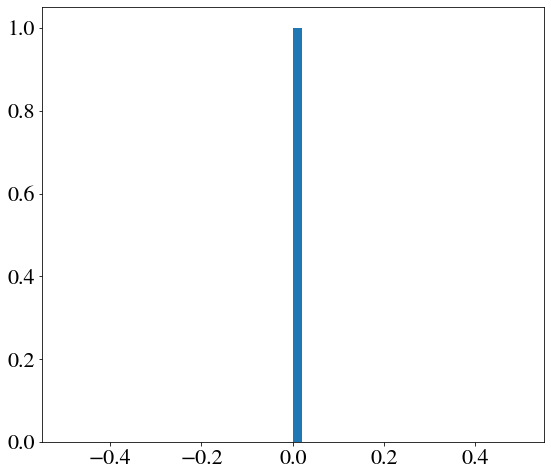

In [10]:
fig, ax = plt.subplots()
ax.hist(h5.root.sipmrd[0, :][0][0],  bins = 50)

In [11]:
index, event_id, sipm_charge, sipm_charge_corr, zval, xval, yval = [], [], [], [], [], [], []
for evt in range(0,100):
    print(f'Event {evt}')
    try:
        h5.root.sipmrd[evt, :]
    except:
        continue
    sens = 0
    for sipmi in h5.root.sipmrd[evt, :]:
        if(sum(sipmi) > 0.):
            index.append(evt)
            event_id.append(event_map[event_map.index == evt].evt_number.values[0])
            sipm_charge.append(sum(sipmi))
            z = min([i for i, x in enumerate(sipmi>0) if x]) - 100
            x = db[db.SensorID == 1000+sens].X.values[0]
            y = db[db.SensorID == 1000+sens].Y.values[0]
            sens = sens + 1
            zval.append(z)
            xval.append(x)
            yval.append(y)
            sipm_charge_corr.append(sum(sipmi)* np.exp(z/12000))
        else:
            sens = sens + 1

sipmtable = {#'index': index,
             'event_id': event_id,
            'charge': sipm_charge,
            'charge_corr': sipm_charge_corr,
            'Z': zval, 
            'X': xval,
            'Y': yval}

sipmtable_df = pd.DataFrame(sipmtable)
sipmtable_df

Event 0
Event 1
Event 2
Event 3
Event 4
Event 5
Event 6
Event 7
Event 8
Event 9
Event 10
Event 11
Event 12
Event 13
Event 14
Event 15
Event 16
Event 17
Event 18
Event 19
Event 20
Event 21
Event 22
Event 23
Event 24
Event 25
Event 26
Event 27
Event 28
Event 29
Event 30
Event 31
Event 32
Event 33
Event 34
Event 35
Event 36
Event 37
Event 38
Event 39
Event 40
Event 41
Event 42
Event 43
Event 44
Event 45
Event 46
Event 47
Event 48
Event 49
Event 50
Event 51
Event 52
Event 53
Event 54
Event 55
Event 56
Event 57
Event 58
Event 59
Event 60
Event 61
Event 62
Event 63
Event 64
Event 65
Event 66
Event 67
Event 68
Event 69
Event 70
Event 71
Event 72
Event 73
Event 74
Event 75
Event 76
Event 77
Event 78
Event 79
Event 80
Event 81
Event 82
Event 83
Event 84
Event 85
Event 86
Event 87
Event 88
Event 89
Event 90
Event 91
Event 92
Event 93
Event 94
Event 95
Event 96
Event 97
Event 98
Event 99


,event_id,charge,charge_corr,Z,X,Y
0,50000,1,1.121219,1373,-285.0,-275.0
1,50000,1,1.124588,1409,-265.0,-275.0
2,50000,1,1.121500,1376,-205.0,-275.0
3,50000,1,1.120099,1361,-365.0,-265.0
4,50000,1,1.121967,1381,-355.0,-265.0
...,...,...,...,...,...,...
443044,50495,1,1.074029,857,-65.0,275.0
443045,50495,1,1.074118,858,5.0,275.0
443046,50495,1,1.073939,856,-165.0,285.0
443047,50495,2,2.147520,854,-45.0,285.0


In [12]:
dv = 0.835
veto_N100 = 20
rmax_N100 = 450
zmin_N100 = veto_N100/dv
zmax_N100 = (1500-veto_N100)/dv

range1 = [zmin_N100, zmax_N100/3]
range2 = [zmax_N100/3, 2*zmax_N100/3]
range3 = [2*zmax_N100/3, zmax_N100]

In [13]:
z = sipmtable_df.groupby(['event_id']).Z
sipmtable_df = sipmtable_df.assign(zmin = z.transform(np.min), zmax = z.transform(np.max))

In [14]:
sipmtable_df

,event_id,charge,charge_corr,Z,X,Y,zmin,zmax
0,50000,1,1.121219,1373,-285.0,-275.0,1340,1424
1,50000,1,1.124588,1409,-265.0,-275.0,1340,1424
2,50000,1,1.121500,1376,-205.0,-275.0,1340,1424
3,50000,1,1.120099,1361,-365.0,-265.0,1340,1424
4,50000,1,1.121967,1381,-355.0,-265.0,1340,1424
...,...,...,...,...,...,...,...,...
443044,50495,1,1.074029,857,-65.0,275.0,777,880
443045,50495,1,1.074118,858,5.0,275.0,777,880
443046,50495,1,1.073939,856,-165.0,285.0,777,880
443047,50495,2,2.147520,854,-45.0,285.0,777,880


In [15]:
sipmtable_df_r1 = sipmtable_df[(sipmtable_df.zmin > range1[0]) & (sipmtable_df.zmax < range1[1])]
sipmtable_df_r2 = sipmtable_df[(sipmtable_df.zmin > range2[0]) & (sipmtable_df.zmax < range2[1])]
sipmtable_df_r3 = sipmtable_df[(sipmtable_df.zmin > range3[0]) & (sipmtable_df.zmax < range3[1])]

In [16]:
sipmtable_df_r1.event_id.unique()

array([50010, 50115, 50120, 50125, 50130, 50140, 50145, 50155, 50175,
       50205, 50225, 50235, 50250, 50255, 50295, 50305, 50310, 50330,
       50360, 50365, 50375, 50395, 50400, 50420, 50430, 50470, 50490])

In [18]:
true_info = mcio.load_mchits_df(filename).reset_index()


In [19]:
true_info

,event_id,particle_id,hit_id,x,y,z,time,energy,label
0,10000,2,0,-273.252563,241.426758,1165.063965,0.003438,0.005813,ACTIVE
1,10000,2,1,-274.151215,241.153534,1164.783936,0.006821,0.006265,ACTIVE
2,10000,2,2,-274.996948,240.948547,1164.333252,0.010204,0.003655,ACTIVE
3,10000,2,3,-275.770691,240.787552,1163.753784,0.013587,0.007961,ACTIVE
4,10000,2,4,-276.710510,240.791855,1163.476929,0.016971,0.009465,ACTIVE
...,...,...,...,...,...,...,...,...,...
31323,10099,1,29,-67.327309,-227.615448,717.441345,0.083392,0.004737,ACTIVE
31324,10099,1,30,-67.297386,-227.657883,717.396484,0.084008,0.005658,ACTIVE
31325,10099,1,31,-67.287834,-227.616028,717.428589,0.084525,0.004181,ACTIVE
31326,10099,1,32,-67.315201,-227.596359,717.456055,0.084970,0.027748,ACTIVE


In [20]:
sipmtable_df_r1.event_id.unique()

array([50010, 50115, 50120, 50125, 50130, 50140, 50145, 50155, 50175,
       50205, 50225, 50235, 50250, 50255, 50295, 50305, 50310, 50330,
       50360, 50365, 50375, 50395, 50400, 50420, 50430, 50470, 50490])

In [21]:
evt = 50420
true_info_evt = true_info[true_info.event_id == event_map[event_map.evt_number == evt].nexus_evt.values[0]]

xt = true_info_evt.x
yt = true_info_evt.y
zt = true_info_evt.z
et = true_info_evt.energy*1000

In [22]:
sipmtable_df_r1_evt = sipmtable_df_r1[sipmtable_df_r1.event_id == evt]

xx = (min(xt)-20, max(xt)+20)
yy = (min(yt)-20, max(yt)+20)


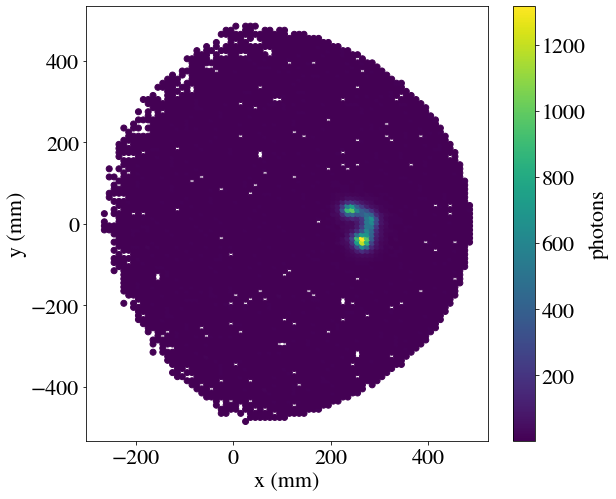

In [23]:
plt.scatter(sipmtable_df_r1_evt.X, sipmtable_df_r1_evt.Y, c=sipmtable_df_r1_evt.charge)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='photons')
#plt.xlim(xx)
#plt.xlim(yy)

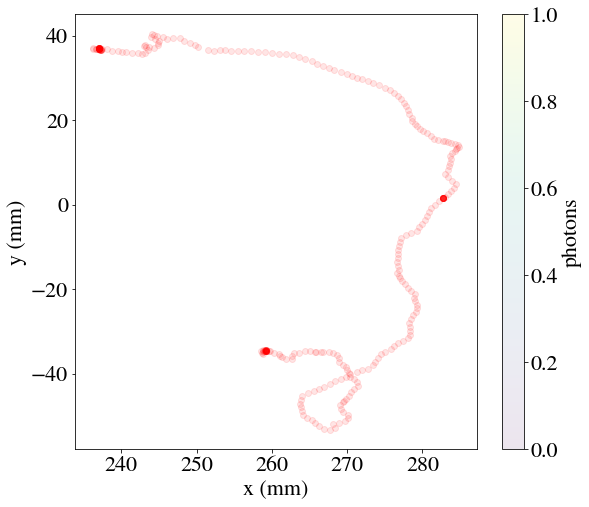

In [24]:
plt.scatter(xt, yt,  alpha=0.1, color='red')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='photons')

In [37]:
sipmtable_df_r1_evt_signalregion = sipmtable_df_r1_evt[(sipmtable_df_r1_evt.X > xx[0]) & (sipmtable_df_r1_evt.X < xx[1])
                                                      & (sipmtable_df_r1_evt.Y > yy[0]) & (sipmtable_df_r1_evt.Y < yy[1])
                                                      ]

In [50]:
sipmtable_df_r1_cut = sipmtable_df_r1[sipmtable_df_r1.charge > Qmin]

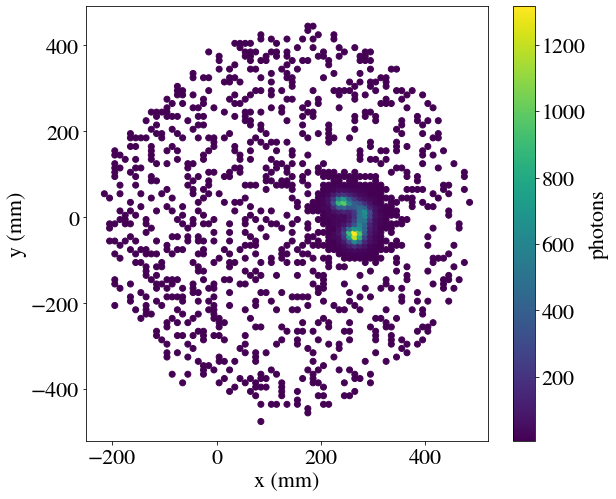

In [54]:
sipmtable_df_r1_cut_evt = sipmtable_df_r1_cut[sipmtable_df_r1_cut.event_id == evt]
plt.scatter(sipmtable_df_r1_cut_evt.X, sipmtable_df_r1_cut_evt.Y, c=sipmtable_df_r1_cut_evt.charge)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='photons')

In [52]:
sipmtable_df_r1_cut_evt_signalregion = sipmtable_df_r1_cut_evt[(sipmtable_df_r1_cut_evt.X > xx[0]) & (sipmtable_df_r1_cut_evt.X < xx[1])
                                                      & (sipmtable_df_r1_cut_evt.Y > yy[0]) & (sipmtable_df_r1_cut_evt.Y < yy[1])
                                                      ]

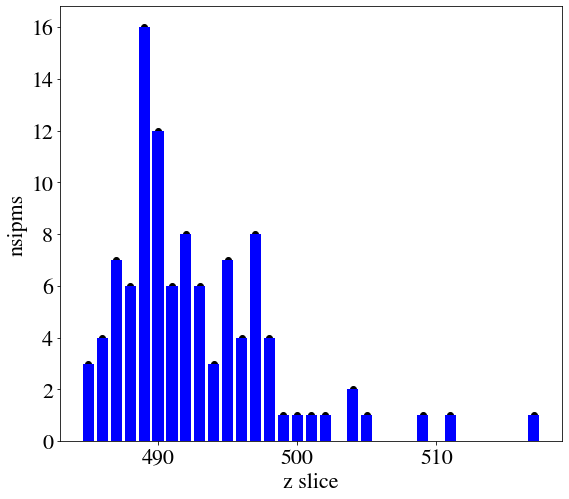

In [64]:
plt.bar(np.sort(sipmtable_df_r1_evt_signalregion.Z.unique()), np.array(sipmtable_df_r1_evt_signalregion.groupby(['Z']).apply(lambda x: len(x))), color='b')
plt.scatter(np.sort(sipmtable_df_r1_cut_evt_signalregion.Z.unique()), np.array(sipmtable_df_r1_cut_evt_signalregion.groupby(['Z']).apply(lambda x: len(x))), marker = 'o', color = 'black')

plt.xlabel('z slice')
plt.ylabel('nsipms')
plt.show()


In [69]:
initialsipms = len(sipmtable_df_r1_evt_signalregion)
aftercut_sipms = len(sipmtable_df_r1_cut_evt_signalregion)

reducedsipms = 100*(initialsipms-aftercut_sipms)/initialsipms

print(f'Initial sipms {initialsipms}, after cuts {aftercut_sipms} -> Reduction {reducedsipms}%')

Initial sipms 104, after cuts 104 -> Reduction 0.0%


date = ['02/22','02/28', '03/09','04/06', '05/04', '05/25']
pp = [15,22,20,15,10,9]
ppe = [1, 1, 1,1,1,1]
fig, ax = plt.subplots()
ax.errorbar(date,pp, yerr=ppe, fmt = '-o')
#ax.errorbar(date,pps, yerr=ppe, fmt = '-o')
plt.ylabel('assitance')
plt.xlabel('software meetings')

In [70]:
sipmtable_df_r2.event_id.unique()

array([50015, 50025, 50035, 50040, 50045, 50050, 50100, 50105, 50160,
       50165, 50215, 50230, 50240, 50260, 50315, 50325, 50335, 50385,
       50410, 50425, 50440, 50445, 50495])

In [71]:
evt = 50230
true_info_evt = true_info[true_info.event_id == event_map[event_map.evt_number == evt].nexus_evt.values[0]]

xt = true_info_evt.x
yt = true_info_evt.y
zt = true_info_evt.z
et = true_info_evt.energy*1000

In [72]:
sipmtable_df_r2_evt = sipmtable_df_r2[sipmtable_df_r2.event_id == evt]

xx = (min(xt)-20, max(xt)+20)
yy = (min(yt)-20, max(yt)+20)


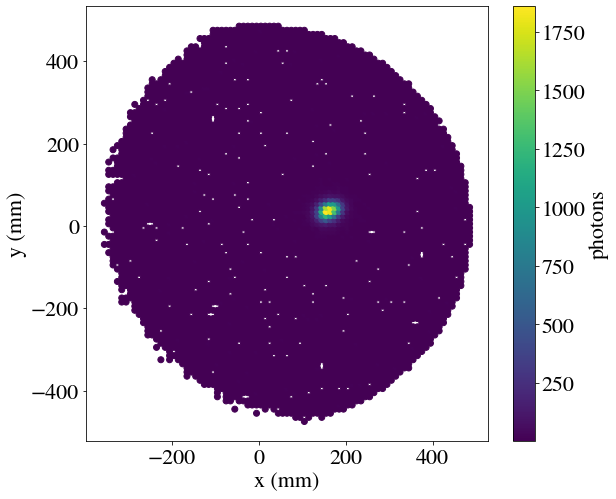

In [73]:
plt.scatter(sipmtable_df_r2_evt.X, sipmtable_df_r2_evt.Y, c=sipmtable_df_r2_evt.charge)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='photons')
#plt.xlim(xx)
#plt.xlim(yy)

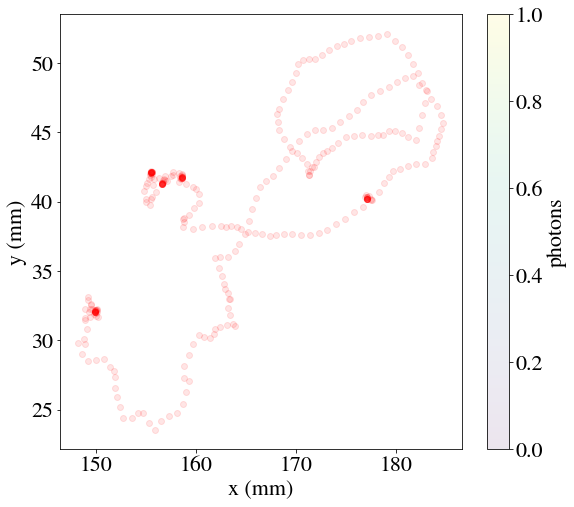

In [74]:
plt.scatter(xt, yt,  alpha=0.1, color='red')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='photons')

In [75]:
sipmtable_df_r2_evt_signalregion = sipmtable_df_r2_evt[(sipmtable_df_r2_evt.X > xx[0]) & (sipmtable_df_r2_evt.X < xx[1])
                                                      & (sipmtable_df_r2_evt.Y > yy[0]) & (sipmtable_df_r2_evt.Y < yy[1])
                                                      ]

In [76]:
sipmtable_df_r2_evt_cut = sipmtable_df_r2_evt[sipmtable_df_r2_evt.charge > Qmin]

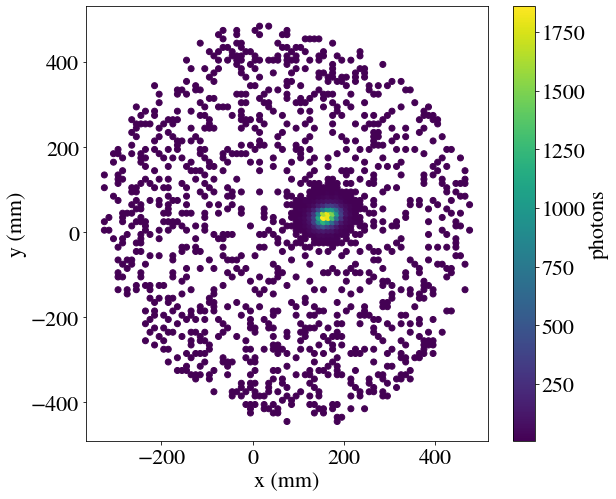

In [77]:
plt.scatter(sipmtable_df_r2_evt_cut.X, sipmtable_df_r2_evt_cut.Y, c=sipmtable_df_r2_evt_cut.charge)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='photons')
#plt.xlim(xx)
#plt.xlim(yy)

In [78]:
sipmtable_df_r2_cut_evt_signalregion = sipmtable_df_r2_evt_cut[(sipmtable_df_r2_evt_cut.X > xx[0]) & (sipmtable_df_r2_evt_cut.X < xx[1])
                                                      & (sipmtable_df_r2_evt_cut.Y > yy[0]) & (sipmtable_df_r2_evt_cut.Y < yy[1])
                                                      ]

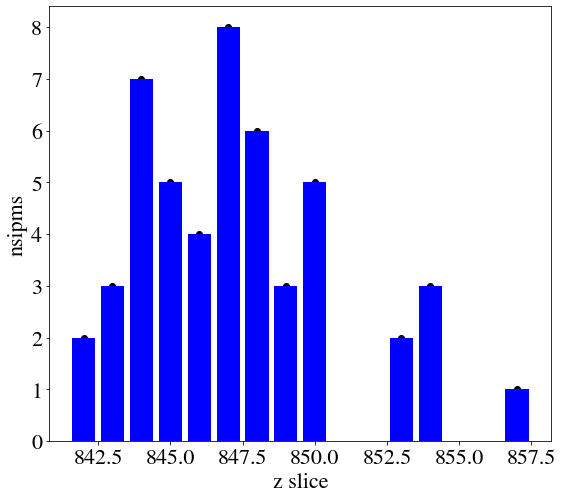

In [79]:
plt.bar(np.sort(sipmtable_df_r2_evt_signalregion.Z.unique()), np.array(sipmtable_df_r2_evt_signalregion.groupby(['Z']).apply(lambda x: len(x))), color='b')
plt.scatter(np.sort(sipmtable_df_r2_cut_evt_signalregion.Z.unique()), np.array(sipmtable_df_r2_cut_evt_signalregion.groupby(['Z']).apply(lambda x: len(x))), marker = 'o', color = 'black')

plt.xlabel('z slice')
plt.ylabel('nsipms')
plt.show()


In [80]:
initialsipms = len(sipmtable_df_r2_evt_signalregion)
aftercut_sipms = len(sipmtable_df_r2_cut_evt_signalregion)

reducedsipms = 100*(initialsipms-aftercut_sipms)/initialsipms

print(f'Initial sipms {initialsipms}, after cuts {aftercut_sipms} -> Reduction {reducedsipms}%')

Initial sipms 49, after cuts 49 -> Reduction 0.0%


In [81]:
sipmtable_df_r3.event_id.unique()

array([50000, 50005, 50020, 50030, 50060, 50065, 50075, 50080, 50095,
       50190, 50210, 50220, 50245, 50290, 50300, 50320, 50355, 50380,
       50390, 50405, 50415, 50450, 50455, 50460, 50475, 50480])

In [82]:
evt = 50320
true_info_evt = true_info[true_info.event_id == event_map[event_map.evt_number == evt].nexus_evt.values[0]]

xt = true_info_evt.x
yt = true_info_evt.y
zt = true_info_evt.z
et = true_info_evt.energy*1000

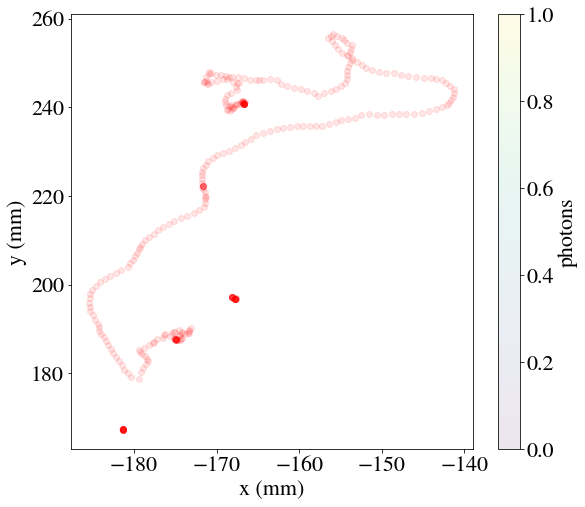

In [83]:
plt.scatter(xt, yt,  alpha=0.1, color='red')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='photons')

In [84]:
sipmtable_df_r3_evt = sipmtable_df_r3[sipmtable_df_r3.event_id == evt]

xx = (min(xt)-20, max(xt)+20)
yy = (min(yt)-20, max(yt)+20)

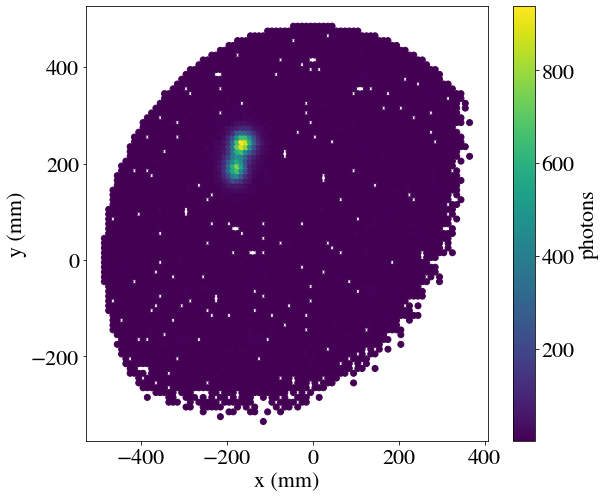

In [85]:
plt.scatter(sipmtable_df_r3_evt.X, sipmtable_df_r3_evt.Y, c=sipmtable_df_r3_evt.charge)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='photons')
#plt.xlim(xx)
#plt.xlim(yy)

In [86]:
sipmtable_df_r3_evt_signalregion = sipmtable_df_r3_evt[(sipmtable_df_r3_evt.X > xx[0]) & (sipmtable_df_r3_evt.X < xx[1])
                                                      & (sipmtable_df_r3_evt.Y > yy[0]) & (sipmtable_df_r3_evt.Y < yy[1])
                                                      ]

In [87]:
sipmtable_df_r3_evt_cut = sipmtable_df_r3_evt[sipmtable_df_r3_evt.charge > Qmin]

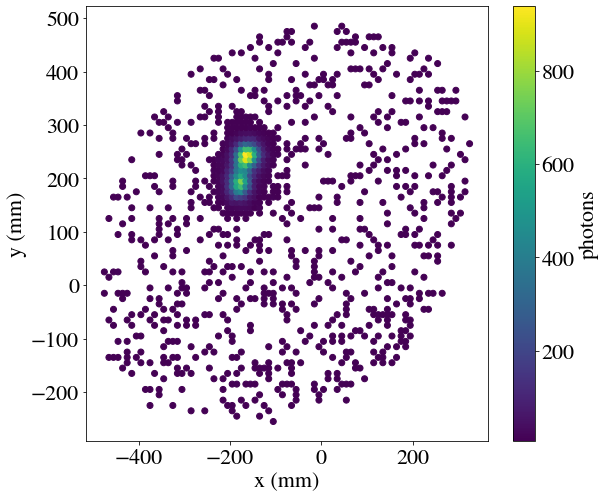

In [88]:
plt.scatter(sipmtable_df_r3_evt_cut.X, sipmtable_df_r3_evt_cut.Y, c=sipmtable_df_r3_evt_cut.charge)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='photons')
#plt.xlim(xx)
#plt.xlim(yy)

In [89]:
sipmtable_df_r3_cut_evt_signalregion = sipmtable_df_r3_evt_cut[(sipmtable_df_r3_evt_cut.X > xx[0]) & (sipmtable_df_r3_evt_cut.X < xx[1])
                                                      & (sipmtable_df_r3_evt_cut.Y > yy[0]) & (sipmtable_df_r3_evt_cut.Y < yy[1])
                                                      ]

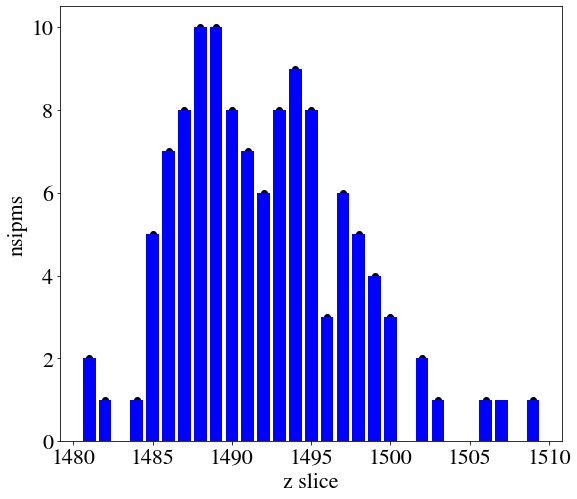

In [91]:
plt.bar(np.sort(sipmtable_df_r3_evt_signalregion.Z.unique()), np.array(sipmtable_df_r3_evt_signalregion.groupby(['Z']).apply(lambda x: len(x))), color='b')
plt.scatter(np.sort(sipmtable_df_r3_cut_evt_signalregion.Z.unique()), np.array(sipmtable_df_r3_cut_evt_signalregion.groupby(['Z']).apply(lambda x: len(x))), marker = 'o', color = 'black')

plt.xlabel('z slice')
plt.ylabel('nsipms')
plt.show()

In [90]:
initialsipms = len(sipmtable_df_r3_evt_signalregion)
aftercut_sipms = len(sipmtable_df_r3_cut_evt_signalregion)

reducedsipms = 100*(initialsipms-aftercut_sipms)/initialsipms

print(f'Initial sipms {initialsipms}, after cuts {aftercut_sipms} -> Reduction {reducedsipms}%')

Initial sipms 117, after cuts 116 -> Reduction 0.8547008547008547%
